### 요구사항
- 기본적인 EDA와 전처리를 진행하세요
- t-test를 이용하여 gate_30 그룹과 gate_40 그룹의 플레이 라운드 수의 평균이 같은지, 다른지 검정하세요.
- chi_squre test를 이용하여 version과 retention_1이 서로 독립인지 검정하세요.
- chi_squre test를 이용하여 version과 retention_2이 서로 독립인지 검정하세요.
- 검정 결과를 해석하고, AB 테스트의 결론을 내려보세요.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency


In [2]:
# 1번 자료

df = pd.read_csv('./data/cookie_cats.csv')
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [ ]:
# 2번 자료

df.shape

In [ ]:
# 3번 자료

df.isnull().sum()

In [ ]:
# 4번 자료

df.nunique()

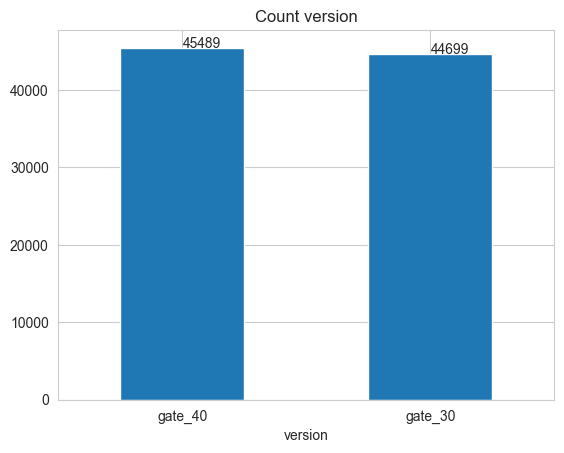

In [15]:
# 5번 자료
# version 개별 수 파악

version_count = df['version'].value_counts()

sns.set_style('whitegrid')
version_count.plot(kind='bar')
plt.title('Count version')
plt.text(0,45489,45489)
plt.text(1,44699,44699)
_=plt.xticks(rotation=0)

In [ ]:
# 6번
# 전체 범위 파악

df[['userid','sum_gamerounds']].sort_values('sum_gamerounds')

# 약 5만 값 1개 ==> 무의미 판단 ==> drop

df = df.drop(df[df['userid'] == 6390605].index,axis = 0)

sns.scatterplot(
    data = df,
    x = 'userid',
    y = 'sum_gamerounds'
).set(title='Gamerounds by Scatterplot')

In [ ]:
# 6-1번

# 전체 범위 파악
df['sum_gamerounds'].sort_values()

# 그래프 그리기
df['sum_gamerounds'].plot(kind='hist',bins=np.arange(0,250,3))
plt.title('Gamerounds by Histogram')

In [ ]:
# 7번 자료
# version별 게임 라운드진행 산포도 그래프

sns.stripplot(
    data = df,
    x = 'version',
    y = 'sum_gamerounds',
    size = 3,
    palette = 'pastel'
).set(title = 'Gamerounds by Version')
plt.ylim(0,2500)

In [ ]:
# 이거 추가하기  *******************
# 난 40라까지가 무료라 40라 평균이 더 높을줄 알았음
# 근데 별로 차이 안남
# 과금 여부보다 게임 자체 재미가 중요?


df[df['version'] == 'gate_30']['sum_gamerounds'].mean()
df[df['version'] == 'gate_40']['sum_gamerounds'].mean()

In [ ]:
# 8번 자료
# retention_1 , retention_7
# True, False 시각화

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(
    data = df,
    x = 'version',
    hue = 'retention_1'
    ).set(title = 'retention_1 by version')

plt.subplot(1,2,2)
sns.countplot(
    data = df,
    x = 'version',
    hue = 'retention_7'
    ).set(title = 'retention_7 by version')



T-Test 가설검정

two sample t test


귀무가설 : gate_30과 gate_40의 sum_gamerounds의 평균 점수 차는 0이다

대립가설 : gate_30과 gate_40의 sum_gamerounds의 평균 점수 차는 0보다 크다

In [ ]:
# gate_30 은 0   //   gate_40 은 1  로 바꿔주기
# 종류가 2가지라 label_encoding 필요 없음

# df.loc[df['version'] == 'gate_30','version'] = 0
# df.loc[df['version'] == 'gate_40','version'] = 1
# df['version']

In [22]:
gate_30 = df[df['version'] == 'gate_30'][['sum_gamerounds']]
gate_40 = df[df['version'] == 'gate_40'][['sum_gamerounds']]

In [23]:
# T-1
test_names = ['sum_gamerounds']

for test_name in test_names:
    statistic,p_value = stats.levene(gate_30[test_name], gate_40[test_name])
    if p_value > 0.05:
        print(f"{test_name} p-value: {p_value}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value}, 이분산 가정 만족")

sum_gamerounds p-value: 0.46694516772623273, 등분산 가정 만족


In [24]:
# T-2
for test_name in test_names:
    t_statistic,pvalue = stats.ttest_ind(
        a = gate_30[test_name],
        b = gate_40[test_name],
        alternative = 'two-sided',  # 양측검정, 기본적
        equal_var = False
)
    if pvalue<0.05:
        print(test_name,pvalue,'귀무가설 기각')
    else:
        print(test_name,pvalue,'귀무가설 기각 불가')
        

# 귀무가설 기각 불가 ==> 두 집단의 평균 점수는 같다!

sum_gamerounds 0.37592438409326223 귀무가설 기각 불가


카이제곱 테스트


1. retention_1의 경우

2. retention_7의 경우

In [25]:
# T-3-1
# 상대도수 분할표 그려보기


retention_1 = pd.crosstab(df['version'],df['retention_1'])
retention_1

retention_1,False,True
version,,
gate_30,24666,20034
gate_40,25370,20119


In [26]:
# T-4-1
chi2_statistics,pvalue,_,_=chi2_contingency(retention_1)

print(f'카이제곱 통계량 : {chi2_statistics}')
print(f'p value : {pvalue}')


# 결론 : 두 집단은 독립이다

카이제곱 통계량 : 3.1591007878782262
p value : 0.07550476210309086


In [27]:
# T-3-2
retention_7 = pd.crosstab(df['version'],df['retention_7'])
retention_7

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


In [29]:
# T-4-2
chi2_statistics,pvalue,_,_=chi2_contingency(retention_7)

print(f'카이제곱 통계량 : {chi2_statistics}')
print(f'p value : {pvalue}')

# 결론 : 두 집단은 종속이다

카이제곱 통계량 : 9.959086799559167
p value : 0.0016005742679058301


In [5]:
retention_1 = pd.crosstab(df['version'],df['retention_1'],margins=True,normalize=True)
retention_1

retention_1,False,True,All
version,,,
gate_30,0.273492,0.222134,0.495626
gate_40,0.281298,0.223076,0.504374
All,0.554790,0.445210,1.000000


In [9]:
retention_7 = pd.crosstab(df['version'],df['retention_7'],normalize=True)
retention_7

retention_7,False,True
version,,
gate_30,0.401362,0.094259
gate_40,0.412583,0.091797


ValueError: pie requires either y column or 'subplots=True'